This part is where we wrangle our data sets, we will use Roosevelt University as our baseline to determine our assumptions

In [519]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans # We're going to use KMeans Clustering for unsupervised learning, 
                                    # this is the most used unsupervised learning algorithm
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler # this is for scaling our feature vectors
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor #We're using Random Forest for our supervised learning algorithm
                                                    # this is one of the most used algorithm in the industry
%matplotlib inline

In [520]:
df = pd.read_csv("C:/Users/Brian/Desktop/A&F/MERGED2014_15_PP.csv",low_memory=False)
df = df[df['UGDS'].between(1000, 5000, inclusive=True)] #setting the colleges that have between 1000 and 5000 undergraduates
df = df.loc[df['HIGHDEG'] == 4] #We will only use colleges that offer 4 year degrees
df["NPT4"] = df.NPT4_PUB.combine_first(df.NPT4_PRIV) #combining the NPT4_PUB and NPT4_PRIV
df["NUM4"] = df.NUM4_PUB.combine_first(df.NUM4_PRIV) #combining the NUM4_PUB and NUM4_PRIV
df = (df[['INSTNM','TUITFTE','GRAD_DEBT_MDN','MD_EARN_WNE_P10','INEXPFTE','AVGFACSAL','NPT4','NUM4','ADM_RATE']])
# these are the columns that we will be using
print (df.head())

                             INSTNM  TUITFTE GRAD_DEBT_MDN MD_EARN_WNE_P10  \
0          Alabama A & M University   9427.0         33775           31000   
4          Alabama State University   7733.0       32871.5           27700   
8   Auburn University at Montgomery   8071.0         20750           33300   
16              Faulkner University  11127.0         21000           35400   
32       University of West Alabama   7928.0         23000           37400   

    INEXPFTE  AVGFACSAL     NPT4   NUM4  ADM_RATE  
0     7437.0     6892.0  15229.0  680.0    0.5256  
4     7618.0     6609.0  11110.0  778.0    0.5326  
8     6837.0     7255.0  13431.0  428.0    0.8017  
16    5826.0     6485.0  20240.0  245.0       NaN  
32    7552.0     6146.0  13092.0  273.0    0.7199  


In [521]:
to_drop = ['PrivacySuppressed','NULL'] # this is to remove cells with strings that contain the words PrivacySuppressed and NULL
new_df = df[~df[['INSTNM','TUITFTE','GRAD_DEBT_MDN','MD_EARN_WNE_P10','INEXPFTE','AVGFACSAL','NPT4','NUM4','ADM_RATE']].isin(to_drop)]
new_df = new_df.dropna() #dropping all rows with NaN
print (new_df.head())

                             INSTNM  TUITFTE GRAD_DEBT_MDN MD_EARN_WNE_P10  \
0          Alabama A & M University   9427.0         33775           31000   
4          Alabama State University   7733.0       32871.5           27700   
8   Auburn University at Montgomery   8071.0         20750           33300   
32       University of West Alabama   7928.0         23000           37400   
36             University of Mobile   9947.0         27000           35200   

    INEXPFTE  AVGFACSAL     NPT4   NUM4  ADM_RATE  
0     7437.0     6892.0  15229.0  680.0    0.5256  
4     7618.0     6609.0  11110.0  778.0    0.5326  
8     6837.0     7255.0  13431.0  428.0    0.8017  
32    7552.0     6146.0  13092.0  273.0    0.7199  
36    6766.0     4914.0  19017.0  184.0    0.5847  


In [522]:
scaler = MinMaxScaler() # We will use the most used scaling which is the MinMaxScaler
new_df[['TUITFTE','GRAD_DEBT_MDN','MD_EARN_WNE_P10','INEXPFTE','AVGFACSAL','NPT4','ADM_RATE']] = scaler.fit_transform(new_df[['TUITFTE','GRAD_DEBT_MDN','MD_EARN_WNE_P10','INEXPFTE','AVGFACSAL','NPT4','ADM_RATE']])
# In here we scale the features that we will be using, the target is usually not scaled that is why we comment out the NUM4
#new_df[['NUM4']] = scaler.fit_transform(new_df[['NUM4']])
print (new_df.head())

                             INSTNM   TUITFTE  GRAD_DEBT_MDN  MD_EARN_WNE_P10  \
0          Alabama A & M University  0.214950       0.722185         0.126747   
4          Alabama State University  0.175293       0.698223         0.095993   
8   Auburn University at Montgomery  0.183206       0.376740         0.148183   
32       University of West Alabama  0.179858       0.436414         0.186393   
36             University of Mobile  0.227123       0.542501         0.165890   

    INEXPFTE  AVGFACSAL      NPT4   NUM4  ADM_RATE  
0   0.101066   0.366077  0.290133  680.0  0.485020  
4   0.104006   0.347036  0.196182  778.0  0.492618  
8   0.091318   0.390500  0.249122  428.0  0.784737  
32  0.102934   0.315885  0.241390  273.0  0.695940  
36  0.090165   0.232995  0.376534  184.0  0.549175  


This the part where we do our KMeans Clustering Unsupervised Learning Algorithm

In [523]:
q = new_df[['TUITFTE','GRAD_DEBT_MDN','MD_EARN_WNE_P10']] # We will use these 3 vectors for our Kmeans clustering
kmeans = KMeans(n_clusters=2, random_state = 42).fit(q)
j = (kmeans.labels_) # determine the labels of our every sample
print (kmeans.cluster_centers_) # this is to know where the clusters centroid are located
print (j)

[[0.21934817 0.45126141 0.20643732]
 [0.45092016 0.51676913 0.31448276]]
[0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1
 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1
 1 0 0 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1
 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0
 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0
 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1
 0 1 0 1 1 0 1 1 0 1 0 1 1 

Roosevelt University is in cluster 1, we determine 2 clusters which we will label the college as whether after graduating we can earn enough money to compensate the debt and tuition we have payed. The result shows that Roosevelt University is worth it

                    INSTNM   TUITFTE  GRAD_DEBT_MDN  MD_EARN_WNE_P10  \
1130  Roosevelt University  0.462392       0.444636         0.244175   

      INEXPFTE  AVGFACSAL      NPT4   NUM4  ADM_RATE  clusters  
1130  0.147821    0.43652  0.486018  339.0  0.757273         1  


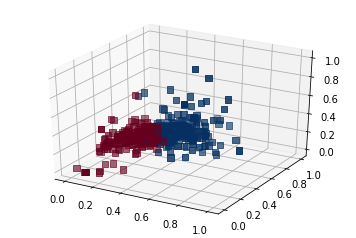

In [524]:
new_df['clusters'] = j # add new column to our dataframe named as clusters
print (new_df[new_df['INSTNM'].str.contains("Roosevelt University")]) #use our alma mater as an example to see which cluster it is located 
# we see that Roosevelt University is in cluster 1
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a = new_df['TUITFTE']
b = new_df['GRAD_DEBT_MDN']
h = new_df['MD_EARN_WNE_P10']
ax.scatter(a,b,h, marker="s", c=new_df["clusters"], s=40, cmap="RdBu")
plt.show()

This is where we do Supervised Learning on the Number of Title IV (NUM4) students as dependent variable

In [525]:
X = new_df[['TUITFTE','GRAD_DEBT_MDN','MD_EARN_WNE_P10','INEXPFTE','AVGFACSAL','NPT4','ADM_RATE']] # features for our Random Forest
y = new_df[['NUM4']] # our target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42) # we us test size of 15% and divide the training and testing sets
rf = RandomForestRegressor()
rf.fit(X_train,y_train.values.ravel())
y_pred = rf.predict(X_test)
print (y_pred) # show all the predictions for our testing sets

[345.5 485.4 282.2 327.4 303.4 242.  356.3 238.3 372.2 611.7 287.6 362.
 350.8 334.2 256.7 373.2 326.6 218.1 340.5 555.1 292.3 256.1 331.3 554.1
 416.8 368.6 251.1 618.  217.1 336.  413.1 373.7 620.1 231.4 222.1 361.7
 185.5 399.5 396.6 243.2 339.5 272.  321.5 459.  179.7 307.3 631.7 416.5
 236.2 255.6 179.2 373.  262.1 174.  400.3 428.  367.2 586.3 262.4 216.2
 353.6 354.5 256.7 489.9 308.3 447.8 301.1 433.5 208.6 315.6 171.9 393.4
 371.2 301.8 497.2 460.1 266.9 286.8 417.5 219.8 206.7 397.  507.1 605.4
 319.6 265.5 282.4 522.8 333.9 246.1 224.8 209.4 458.4 457.7 341.6 275.8
 247.8]


In [526]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

print (feature_importances) # show which features has the greatest impact on the target, the higher the greater impact
print ("Mean Sqared Error :", mean_squared_error(y_test, y_pred)) # This is to check our MSE, the lower the better
print('Variance score: ', r2_score(y_test, y_pred)) # 1 is the perfect prediction

                 importance
GRAD_DEBT_MDN      0.195945
AVGFACSAL          0.178144
MD_EARN_WNE_P10    0.141365
ADM_RATE           0.134944
INEXPFTE           0.131651
TUITFTE            0.110120
NPT4               0.107832
Mean Sqared Error : 28354.58865979381
Variance score:  0.09271846787151361


In [527]:
print (new_df[new_df['INSTNM'].str.contains("Roosevelt University")])

                    INSTNM   TUITFTE  GRAD_DEBT_MDN  MD_EARN_WNE_P10  \
1130  Roosevelt University  0.462392       0.444636         0.244175   

      INEXPFTE  AVGFACSAL      NPT4   NUM4  ADM_RATE  clusters  
1130  0.147821    0.43652  0.486018  339.0  0.757273         1  


Using Roosevelt University as an example, we can see that our prediction on NUM4 comes extremely close to our actual target which is 339. This means that our model is quite good in predicting continuous variable even though our MSE and variance is not good

In [528]:
print(rf.predict([[19997,23310,43600,10315,7939,23817,0.7764]])) # this is where we do our predictions to features that we want to be predicted
print(rf.predict([[19997,23310,43600,10315,7939,22149.81,0.7764]]))

[332.2]
[332.2]


This is where we answer Question # 3, it has the same process as before except we use TUITFTE as our dependent variable and added N4 as one of our independent variables which is the multiplication of NUM4 and NPT4

In [529]:
df2 = df[~df[['INSTNM','TUITFTE','GRAD_DEBT_MDN','MD_EARN_WNE_P10','INEXPFTE','AVGFACSAL','NPT4','NUM4','ADM_RATE']].isin(to_drop)]
df2 = df2.dropna()
df2['N4'] = df2['NUM4'] * df2['NPT4'] # add new column which is N4, we multiply it so the decrease of net price can affect the entire college
scaler = MinMaxScaler()
df2[['GRAD_DEBT_MDN','MD_EARN_WNE_P10','INEXPFTE','N4','AVGFACSAL','ADM_RATE']] = scaler.fit_transform(df2[['GRAD_DEBT_MDN','MD_EARN_WNE_P10','INEXPFTE','N4','AVGFACSAL','ADM_RATE']])
print (df2.head())

                             INSTNM  TUITFTE  GRAD_DEBT_MDN  MD_EARN_WNE_P10  \
0          Alabama A & M University   9427.0       0.722185         0.126747   
4          Alabama State University   7733.0       0.698223         0.095993   
8   Auburn University at Montgomery   8071.0       0.376740         0.148183   
32       University of West Alabama   7928.0       0.436414         0.186393   
36             University of Mobile   9947.0       0.542501         0.165890   

    INEXPFTE  AVGFACSAL     NPT4   NUM4  ADM_RATE        N4  
0   0.101066   0.366077  15229.0  680.0  0.485020  0.305830  
4   0.104006   0.347036  11110.0  778.0  0.492618  0.254031  
8   0.091318   0.390500  13431.0  428.0  0.784737  0.166442  
32  0.102934   0.315885  13092.0  273.0  0.695940  0.100659  
36  0.090165   0.232995  19017.0  184.0  0.549175  0.098390  


In [530]:
X_new = df2[['N4','GRAD_DEBT_MDN','MD_EARN_WNE_P10','INEXPFTE','AVGFACSAL','ADM_RATE']]
y_new = df2['TUITFTE']
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.15, random_state=42)
rf2 = RandomForestRegressor()
rf2.fit(X_new_train,y_new_train.values.ravel())
y_new_pred = rf2.predict(X_new_test)
print (y_new_pred)

[ 7518.6 11345.8 15153.7  8809.1 19074.7 14892.2 14748.9 12663.3 11679.5
  8002.8 20255.  18700.5 10698.8 12584.8 12470.5 16580.1 18198.8 11264.
  9615.7 21361.2 13692.9 18691.2  7219.7 18001.5 15040.8  5284.8  6893.
 11261.6 14391.3 17335.2 22438.9 19011.8 19360.8  9644.9 28548.8 23365.8
  7842.   5829.5 17546.7 13798.3  8829.7 13550.6 15905.1  9580.6 28140.4
  6826.4  4583.  15446.7 11848.9 14211.8 14359.9  8644.8 14065.4 15208.8
 21966.2 21793.8  6181.3 15119.7 35097.9  9418.7 10302.6 14514.  10908.8
  9122.7  8961.2 16489.4 10946.3 15511.8 11544.9 14023.4  8395.6 21022.2
 15511.8 15719.9 16511.6 18499.8 12498.6 10973.7  8487.1 12900.4 12319.4
 15172.2  9206.7  5050.3 15602.7 12539.7 14039.8 25454.4  5780.9 13540.
 14248.8 11333.  21667.2 12859.9 12470.7 28593.8  9154.6]


In [531]:
feature_importances = pd.DataFrame(rf2.feature_importances_,
                                   index = X_new_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

print (feature_importances)
print ("Mean Sqared Error :", mean_squared_error(y_test, y_pred))
print('Variance score: ', r2_score(y_test, y_pred))

                 importance
INEXPFTE           0.451089
MD_EARN_WNE_P10    0.169871
N4                 0.111334
AVGFACSAL          0.092675
GRAD_DEBT_MDN      0.089452
ADM_RATE           0.085579
Mean Sqared Error : 28354.58865979381
Variance score:  0.09271846787151361


Using our model we can see that decreasing the N4 by 7% has no effect on our total net tuition revenue(TUITFTE) this may be because our model is showing very high MSE and extremely low variance. 

In [532]:
print (rf2.predict([[8073963,23310,43600,10315,7939,0.7764]]))
print (rf2.predict([[7508786,23310,43600,10315,7939,0.7764]]))

[19835.]
[19835.]


SUMMARY

Using Roosevelt University as our example, we use KMeans Clustering to determine whether our school is worth it or not and the results shows that the college is in cluster 1 which means it is worth it, which means that our future earnings can pay out the debt and tuition we have incurred.

Using Random Forest Regressor, we can see that our predicting target comes close in determining the actual target which means the model is good enough to predict the Number of TITLE IV students even though our MSE and variance is not good.

For Question 3 we use TUITFTE as our dependent variable and decrease the N4 by 7% and the result shows that it has no effect on TUITFTE.

